In [149]:
import pandas as pd
import os
from datetime import datetime
import numpy as np

#                               !!!INPUT FILES NEED TO BE CSV FORMAT!!!
#           As usual make sure to format any timestamps in the input files as number,
#           or else this script will read all timestamps as '#.###E+12'

#                                   Changes/input needed to run this script:
#                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#   1. file path for the csv with all timestamps, probably fracBRAIN stage download (sfg.csv).
#   2. file path for the csv with list of timestamps you want to match, i.e. field csv (field.csv)
#   3. file path for the output csv that will be the two files above, merged via vlookup (output.csv)
#   4. make sure both input files have the same header name for timestamp column. Best to use 'timestamp'
#      as the header name.
#   5. select if you want to add an epoch timestamp column to field csv - add_timestamp = "y"
#   6. select if you want to delete the unit row (extra row below headers) - delete_unit_row = "y"
#   7. select a time_offset, if needed, to shift the field csv by x amount of seconds.
#   8. (OPTIONAL) save the file you just added to timestamps to. saves to a new file, does not overwrite.

#   


# file paths for the input and output csv~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# step (1)
path = 'C:\\Users\\rivil\\Downloads'
file_name_sfg = 'Bagpipe State 22 G 86H 8.csv' 
full_path_sfg = os.path.join(path,file_name_sfg)
# step (2)
file_name_field = 'Copy of Occidental Petroleum Corporation_G 86H_Interval_8_DataListing.xlsx'
full_path_field = os.path.join(path,file_name_field)
# step (3)
file_name_sfg_output = file_name_sfg.split(".")[0]+'_out.'+file_name_sfg.split(".")[-1]
full_path_output = os.path.join(path,file_name_sfg_output)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# create dataFrames from files ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# if one file does not have any headers for some reason, remove header=0
df_sfg = pd.read_csv(full_path_sfg, header=0, index_col=None)
df_sfg = df_sfg.iloc[:,:-2]

df_field = pd.read_excel(full_path_field,sheet_name=0,header=0,index_col=False,keep_default_na=True)
#df_field = pd.read_csv(full_path_field, header=0, index_col=None)
df_field = df_field[1:]

# transform objt into floating types
for column in df_field.columns[6:]:
    df_field[column] = df_field[column].map(lambda x: float(x))
df_field.dtypes

print(df_sfg.shape)
print(df_field.shape)

(12108, 98)
(9635, 25)


In [150]:
 # Function to subtract subsequent rows and add empty rows
def subtract_and_add_empty_rows(df, column_name):
    input_min = df_sfg.timestamp.min()
    input_max = df_sfg.timestamp.max()
    result_data = []
    counts=0

    for i in range(len(df) - 1):
        result_data.append(df.at[i, column_name])
        
        diff = int(abs(df.at[i, column_name] - df.at[i + 1, column_name])/1000)
        
        
        if(diff>1.0): 
            for j in range(abs(diff) - 1):
                counts+=1
                result_data.append(np.nan)  # Adding as many empty rows as the difference

    # Adding the last value from the original DataFrame
    result_data.append(df.at[len(df) - 1, column_name])

    temp_df = pd.DataFrame({column_name: result_data})
    temp_df.reset_index(drop=True, inplace=True)
    
   
    result_df = temp_df.merge(df, how='left', left_on='timestamp', right_on=['timestamp'])
    #result_df.fillna()
    temp_min = result_df.timestamp.min()
    temp_max = result_df.timestamp.max()    
    
    print("input data dimensions:", df.shape)
    print("timestamp input values min, max",input_min,input_max)
    print("output data dimensions:", result_df.shape)
    print("timestamp output values min, max",input_min,input_max)
    print("Added emtpy rows:", counts)
    
    return result_df



In [151]:
# Apply the function
result_df = subtract_and_add_empty_rows(df_sfg, 'timestamp')


input data dimensions: (12108, 98)
timestamp input values min, max 1706674744000 1706687006000
output data dimensions: (12263, 98)
timestamp output values min, max 1706674744000 1706687006000
Added emtpy rows: 155


In [152]:
result_df

,timestamp,Time,MRL_Const,Well_Name,Stage,P1,P2,P3,P4,P5,...,PC3_PPS_CH2_Bat,PC3_PPS_CH3_Bat,PC4_Date,PC4_Time,PC4_PPS_CH1,PC4_Perry State_51_6_1H,PC4_PPS_CH3,PC4_Perry State_51_6_1H_Bat,PC4_Perry State_51_6_1H_Bat.1,PC4_PPS_CH3_Bat
0,1.706675e+12,01/31/2024 04:19:04,1348.0,G 86H,8.0,3579.816,3345.383,4096.875,-3703.387,-3607.038,...,65535.0,65535.0,31/1/2024,04:19:04,16.709732,1798.812622,0.0,99.0,98.0,65535.0
1,1.706675e+12,01/31/2024 04:19:05,1349.0,G 86H,8.0,3579.816,3345.976,4097.471,-3703.983,-3606.444,...,65535.0,65535.0,31/1/2024,04:19:05,16.709732,1798.948853,0.0,99.0,98.0,65535.0
2,1.706675e+12,01/31/2024 04:19:06,1350.0,G 86H,8.0,3579.816,3344.791,4096.278,-3703.983,-3607.038,...,65535.0,65535.0,31/1/2024,04:19:06,16.709732,1798.775757,0.0,99.0,98.0,65535.0
3,1.706675e+12,01/31/2024 04:19:07,1351.0,G 86H,8.0,3581.006,3346.569,4094.488,-3703.983,-3605.849,...,65535.0,65535.0,31/1/2024,04:19:07,16.709732,1798.698242,0.0,99.0,98.0,65535.0
4,1.706675e+12,01/31/2024 04:19:08,1352.0,G 86H,8.0,3580.411,3347.161,4095.084,-3703.983,-3606.444,...,65535.0,65535.0,31/1/2024,04:19:08,16.709732,1798.937622,0.0,99.0,98.0,65535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12258,1.706687e+12,01/31/2024 07:43:22,3604.0,C 15H,8.0,8695.453,3540.951,3592.221,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:22,16.709732,1734.715332,0.0,99.0,98.0,65535.0
12259,1.706687e+12,01/31/2024 07:43:23,3605.0,C 15H,8.0,8732.941,3541.543,3592.221,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:23,16.709732,1734.705200,0.0,99.0,98.0,65535.0
12260,1.706687e+12,01/31/2024 07:43:24,3606.0,C 15H,8.0,8698.429,3540.358,3591.028,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:24,16.709732,1734.729614,0.0,99.0,98.0,65535.0
12261,1.706687e+12,01/31/2024 07:43:25,3607.0,C 15H,8.0,8700.809,3540.951,3592.818,-3705.175,-3606.444,...,65535.0,65535.0,31/1/2024,07:43:25,16.709732,1734.547241,0.0,99.0,98.0,65535.0


In [153]:
result_df[result_df.isna().all(axis=1)]

,timestamp,Time,MRL_Const,Well_Name,Stage,P1,P2,P3,P4,P5,...,PC3_PPS_CH2_Bat,PC3_PPS_CH3_Bat,PC4_Date,PC4_Time,PC4_PPS_CH1,PC4_Perry State_51_6_1H,PC4_PPS_CH3,PC4_Perry State_51_6_1H_Bat,PC4_Perry State_51_6_1H_Bat.1,PC4_PPS_CH3_Bat
2594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


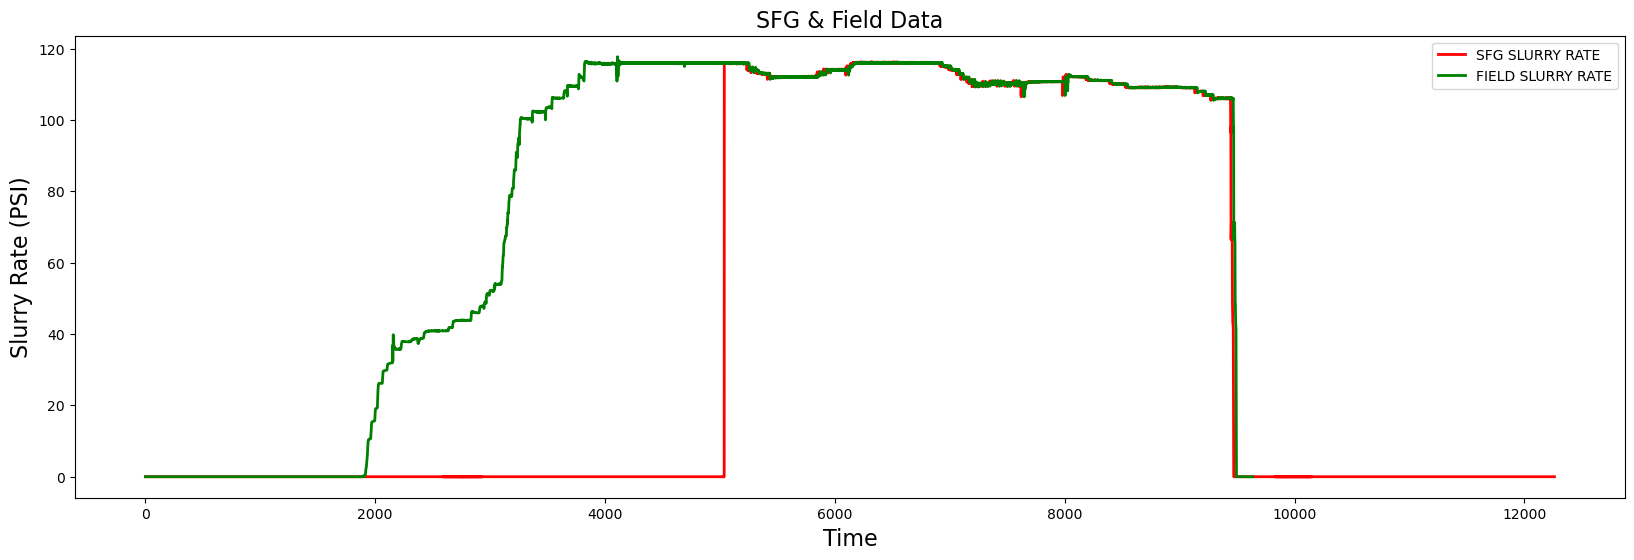

In [160]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(result_df.index.values, result_df['Slurry Rate'].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field.index.values, df_field['SlurryRate'].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()


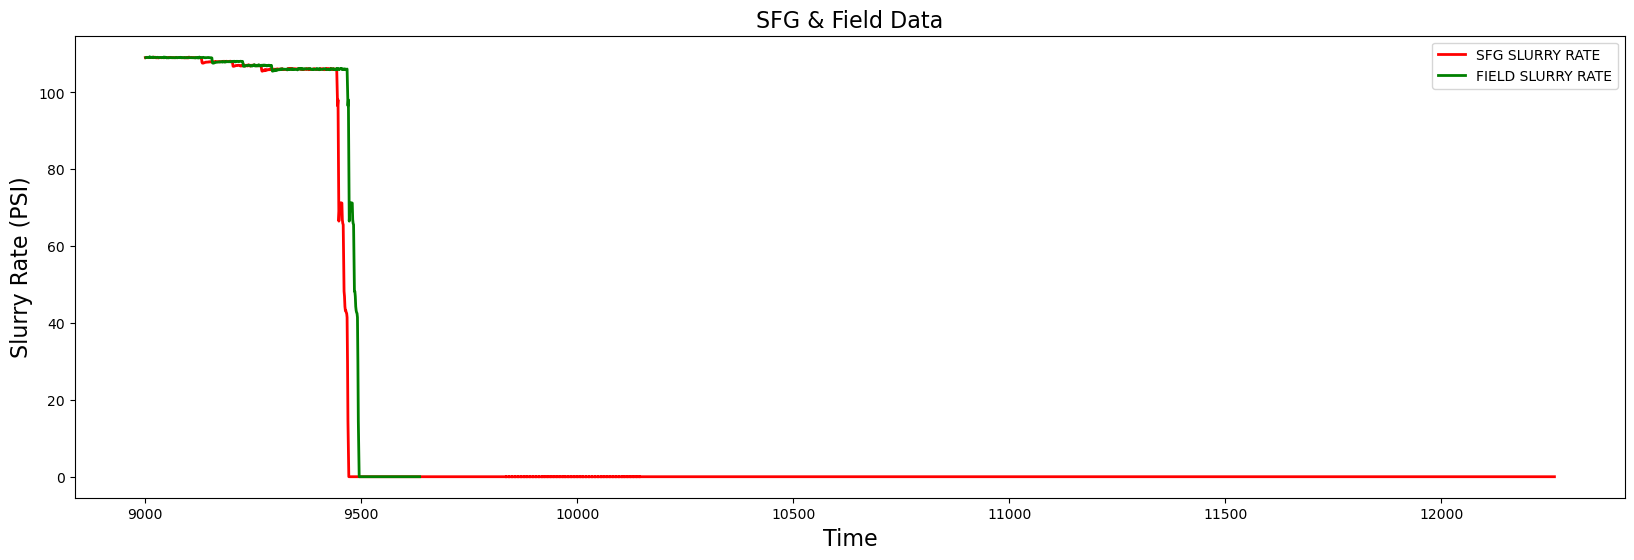

In [391]:
# Plotting Close Value Data
start_date = 9000
end_date = 10000
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(result_df[start_date:].index.values, result_df['Slurry Rate'][start_date:].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field[start_date:].index.values, df_field['SlurryRate'][start_date:].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

In [392]:
# convertion to series
result_df_s = pd.Series(result_df['Slurry Rate'][start_date:end_date].interpolate().values)
print(type(result_df_s))
print(np.count_nonzero(np.isnan(result_df_s)))


df_field_s = pd.Series(df_field['SlurryRate'][start_date:end_date].interpolate().values)
print(type(df_field_s))
df_field_s
print(np.count_nonzero(np.isnan(df_field_s)))


<class 'pandas.core.series.Series'>
0
<class 'pandas.core.series.Series'>
0


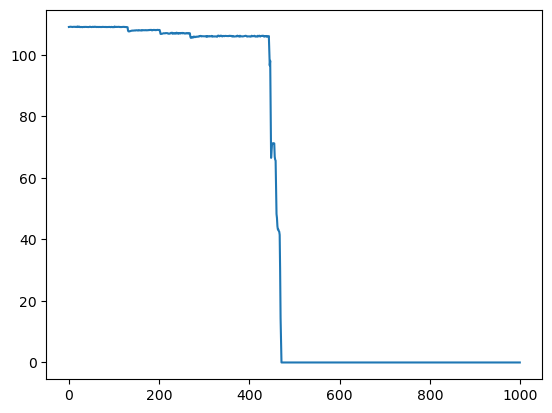

In [393]:
plt.plot(result_df_s)

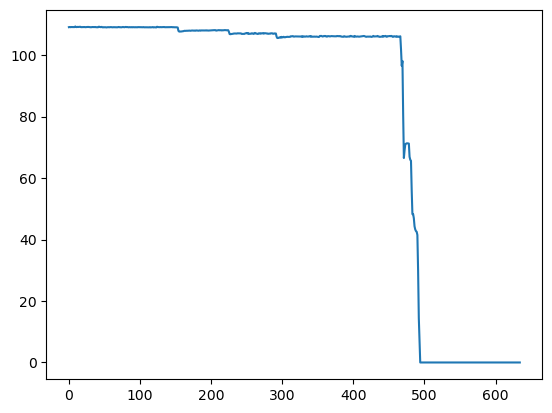

In [394]:
plt.plot(df_field_s)

In [ ]:
def pad_series(series1, series2):
    """
    Pad the shorter series with zeros to make them of equal length.
    
    Args:
    - series1: First pandas Series.
    - series2: Second pandas Series.
    
    Returns:
    - Tuple of padded series1 and series2.
    """
    len1 = len(series1)
    len2 = len(series2)
    
    if len1 < len2:
        series1 = pd.concat([series1, pd.Series([0] * (len2 - len1))], ignore_index=True)
    elif len2 < len1:
        series2 = pd.concat([series2, pd.Series([0] * (len1 - len2))], ignore_index=True)
    
    return series1, series2

In [367]:
full_path_output_s1 = os.path.join('C:\\Users\\rivil\\Downloads','result_df_s_output')  # ** Outputs into the same Input Path
result_df['Slurry Rate'][start_date:end_date].interpolate().to_csv(full_path_output_s1, index=False, mode='w+')

full_path_output_s2 = os.path.join('C:\\Users\\rivil\\Downloads','df_field_s_output')  # ** Outputs into the same Input Path
df_field['SlurryRate'][start_date:end_date].interpolate().to_csv(full_path_output_s2, index=False, mode='w+')




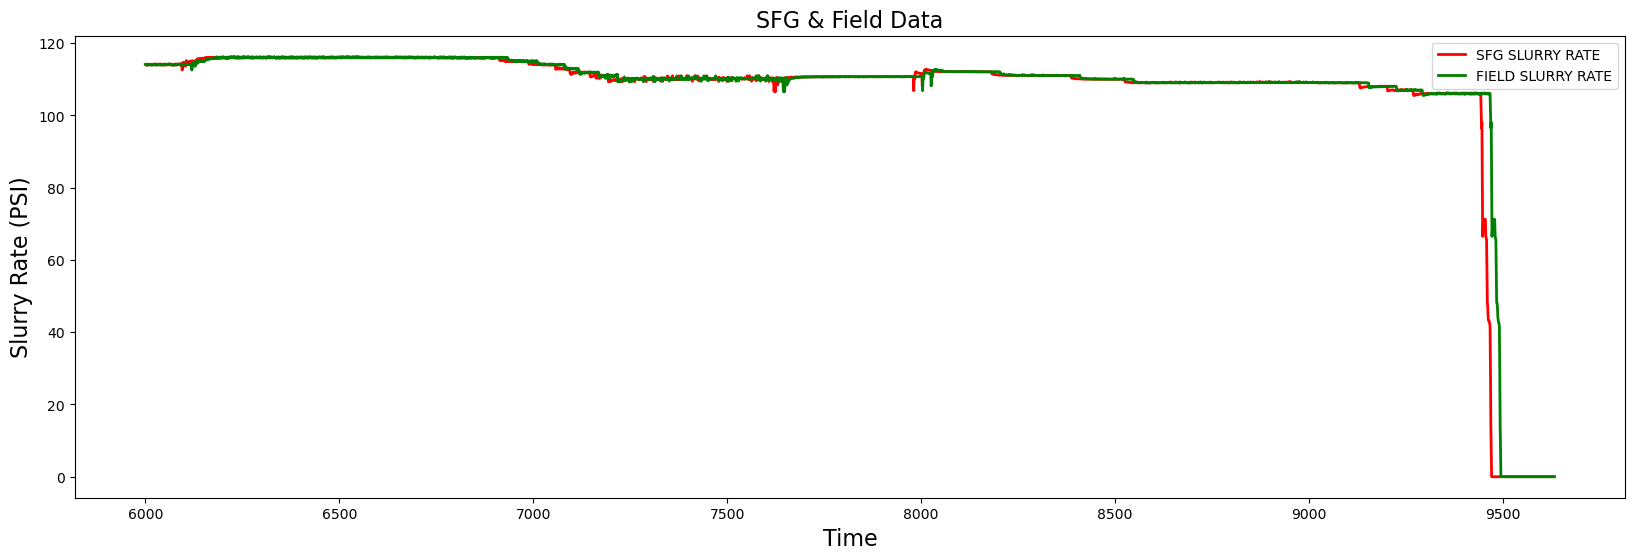

In [337]:
# Plotting Close Value Data
start_date = 6000
end_date = 9633
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(result_df[start_date:end_date].index.values, result_df['Slurry Rate'][start_date:end_date].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field[start_date:end_date].index.values, df_field['SlurryRate'][start_date:end_date].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

In [343]:
len(result_df_s),len(df_field_s)

(3633, 3633)

In [344]:
# cross correlation

from scipy import signal

def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c

#ccf_ielts = ccf_values(result_df_s, df_field_s)
ccf_ielts = ccf_values(result_df_s,df_field_s)
ccf_ielts

array([-0.00044677, -0.0008838 , -0.0013194 , ..., -0.00119545,
       -0.0007979 , -0.00039643])

In [350]:
# list of of our lag values
lags = signal.correlation_lags(len(result_df_s),len(df_field_s))
lags

array([-3632, -3631, -3630, ...,  3630,  3631,  3632])

In [351]:
len(lags),len(ccf_ielts)

(7265, 7265)

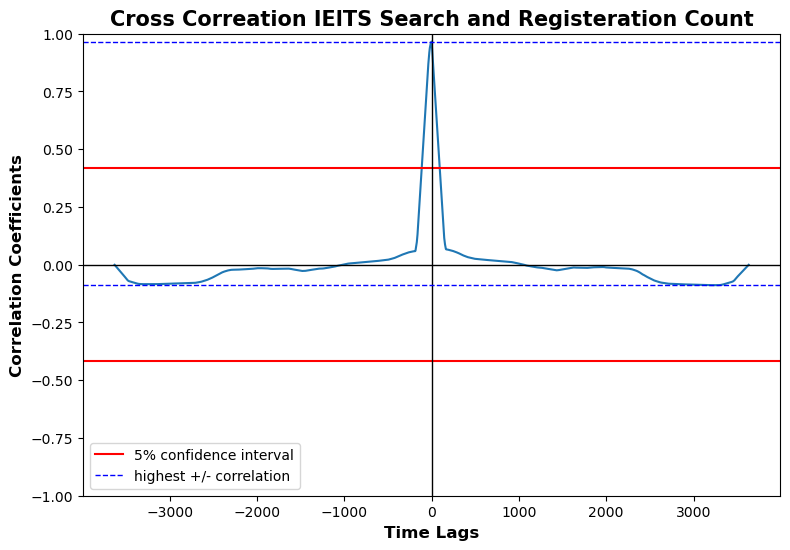

In [352]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
#ccf_plot(lags[1620:1670], ccf_ielts[1620:1670])
ccf_plot(lags, ccf_ielts)

0.9662119008205929 0.31128795439287404
3632


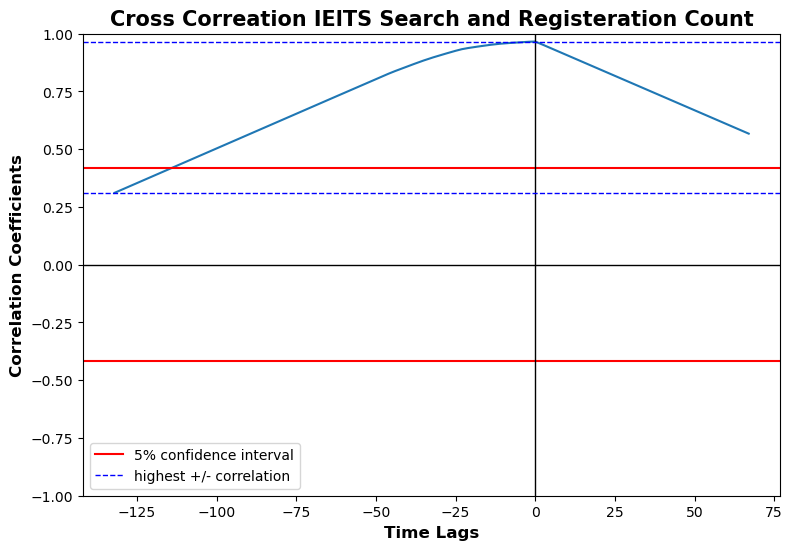

In [365]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    print(max(ccf),min(ccf))
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags[3500:3700], ccf_ielts[3500:3700])
print(np.argmax(ccf_ielts))

[-5.49441993e-09 -1.04655618e-09 -2.87802949e-09 ... -2.09311235e-09
 -8.37244942e-09 -6.27933706e-09]
3632 3632
Lag/lead between Series1 and Series2: 0


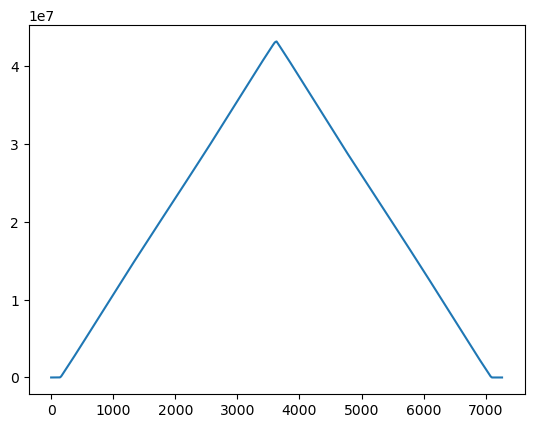

In [390]:
cross_corr = signal.correlate(result_df_s,df_field_s,mode='full')
print(cross_corr)
plt.plot(cross_corr)
print(np.argmax(cross_corr),cross_corr.argmax())
# Find lagging/leading value
lag_lead = cross_corr.argmax() - (len(result_df_s) - 1)
print("Lag/lead between Series1 and Series2:", lag_lead)


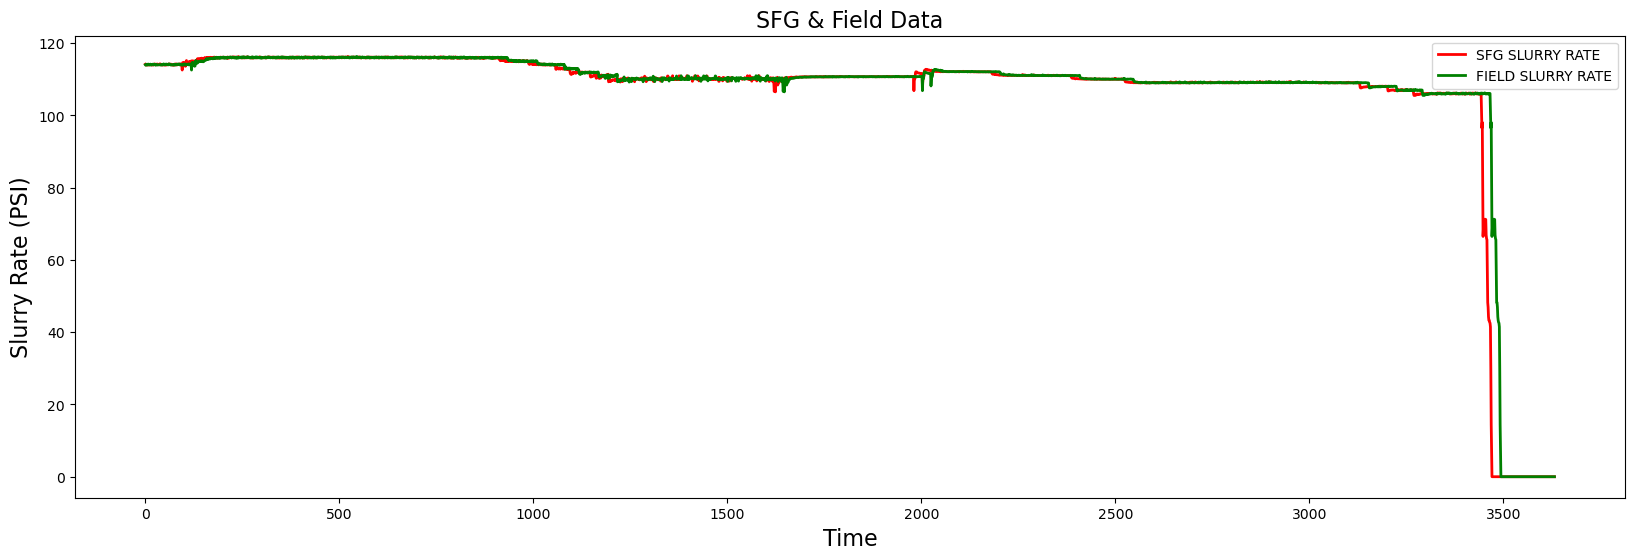

In [387]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(result_df_s.index, result_df_s, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field_s.index, df_field_s, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

In [368]:
print(len(result_df_s),len(df_field_s))

3633 3633


In [381]:
import pandas as pd
from scipy import signal

# Sample data
data = {'Series1': [10, 20, 30, 40, 50],
        'Series2': [15, 25, 35, 0, 0]}

# Create DataFrame
df = pd.DataFrame(data)

# Compute cross-correlation
cross_corr = signal.correlate(df['Series1'], df['Series2'], mode='full')

# Find lagging/leading value
lag_lead = cross_corr.argmax() - (len(df['Series1']) - 1)

print("Lag/lead between Series1 and Series2:", lag_lead)

Lag/lead between Series1 and Series2: 2
